In [1]:
%matplotlib widget
%load_ext autoreload
%autoreload 2
import numpy as np
import sys
import matplotlib.pyplot as plt
import matplotlib.animation
import yaml
import cv2
from scipy.spatial.transform import Rotation
from matplotlib.patches import Rectangle
from tqdm import tqdm


sys.path.append('/home/schiavazza/code/hpe/hpe-core/datasets/')

from vicon_processing.src.projection import ProjectionHelper
from vicon_processing.src.data_helpers import DvsLabeler, DvsHelper, C3dHelper
from vicon_processing.src import vis_utils, utils

In [3]:
# import the DVS data
dvs_file_path = '/home/schiavazza/data/hpe/vicon_recordings/stefano/1'
dvs_helper = DvsHelper(dvs_file_path)

In [91]:
dvs_helper.read_points_labels('../data/points_giovanna5_2.yml');
labels_times = dvs_helper.labeled_points['times'][:2]
print(labels_times)
# labels_times = [0.0]

[14.0, 15.0]


In [92]:
labels = list(dvs_helper.labeled_points['points'][0].keys())
print(labels)

['P000:CLAV', 'P000:LASI', 'P000:LELB', 'P000:LFRM', 'P000:LUPA', 'P000:RASI', 'P000:STRN']


In [93]:
# load c3d vicon data
c3d_file_path = '/home/schiavazza/data/hpe/vicon_recordings/EDPR_hpe/human_pose_estimation/P000/session/giovanna5.c3d'
c3d_helper = C3dHelper(c3d_file_path)
print(c3d_helper.reader.point_labels)

/home/schiavazza/code/hpe/hpe-core/datasets/vicon_processing/venv/lib/python3.10/site-packages/c3d/c3d.py:1219: UserWarning: No analog data found in file.
  warnings.warn('No analog data found in file.')
/home/schiavazza/code/hpe/hpe-core/datasets/vicon_processing/src/data_helpers.py:46: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, count = scipy.stats.mode(n_points)


['P000:LFHD                     ' 'P000:RFHD                     '
 'P000:LBHD                     ' 'P000:RBHD                     '
 'P000:C7                       ' 'P000:CLAV                     '
 'P000:STRN                     ' 'P000:RBAK                     '
 'P000:LSHO                     ' 'P000:LUPA                     '
 'P000:LELB                     ' 'P000:LFRM                     '
 'P000:LWRA                     ' 'P000:LWRB                     '
 'P000:LFIN                     ' 'P000:RSHO                     '
 'P000:RUPA                     ' 'P000:RELB                     '
 'P000:RFRM                     ' 'P000:RWRA                     '
 'P000:RWRB                     ' 'P000:RFIN                     '
 'P000:LASI                     ' 'P000:RASI                     '
 'P000:LPSI                     ' 'P000:RPSI                     '
 'P000:LTHI                     ' 'P000:LKNE                     '
 'P000:LTIB                     ' 'P000:LANK                  

In [94]:
c3d_helper.reader.frame_count

3936

In [95]:
# labels_times = [8.0, 9.0, 10.0, 11.0, 12.0, 13.0]
vicon_labeled_frames = c3d_helper.get_frame_time(labels_times)
print(c3d_helper.frame_times)
vicon_points = c3d_helper.get_vicon_points(vicon_labeled_frames, labels)
vicon_points_mark = c3d_helper.transform_points_to_marker_frame(vicon_points)
# vicon_points_mark = vicon_points
print(vicon_labeled_frames)

[-1.62       -1.60999746 -1.59999492 ... 37.71999492 37.72999746
 37.74      ]
[1562, 1662]


In [96]:
c3d_helper.markers_T

{1562: array([[-5.67382260e-01,  4.30328987e-01,  7.02064303e-01,
          2.05095579e+02],
        [ 6.91343652e-01, -2.14236209e-01,  6.90033903e-01,
          1.81554135e+03],
        [ 4.47349211e-01,  8.76880733e-01, -1.75951420e-01,
          6.22156134e+02],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          1.00000000e+00]]),
 1662: array([[-7.07427532e-01,  6.32294914e-03,  7.06757629e-01,
         -5.37128084e+01],
        [ 6.87327885e-01,  2.39174492e-01,  6.85839609e-01,
          1.90113918e+03],
        [-1.64701860e-01,  9.70956004e-01, -1.73544553e-01,
         -1.70067970e+02],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          1.00000000e+00]])}

In [97]:
print(f"times from dvs labels: {dvs_helper.labeled_points['times']}")
print(f"times from vicon labels: {vicon_points_mark['times']}")

times from dvs labels: [14.0, 15.0]
times from vicon labels: [14.0039695  15.00422363]


In [98]:
dvs_helper.labeled_points['times']

[14.0, 15.0]

In [99]:
vicon_points_mark['times']

array([14.0039695 , 15.00422363])

In [100]:
proj_helper = ProjectionHelper(vicon_points_mark, dvs_helper.labeled_points)
proj_helper.import_camera_calbration('../data/temp_calib.txt');

Number of 3d points: 14
Number of image points: 14


In [101]:
proj_helper.image_points

array([[111.,  96.,   1.],
       [151., 207.,   1.],
       [179., 163.,   1.],
       [182., 182.,   1.],
       [168., 138.,   1.],
       [ 95., 208.,   1.],
       [119., 110.,   1.],
       [484.,  96.,   1.],
       [518., 211.,   1.],
       [545., 166.,   1.],
       [548., 188.,   1.],
       [536., 143.,   1.],
       [457., 208.,   1.],
       [488., 111.,   1.]])

In [102]:
# tmp = np.copy(proj_helper.world_points[:7])
# proj_helper.world_points[:7] = proj_helper.world_points[7:]
# proj_helper.world_points[7:] = tmp
# # proj_helper.world_points = np.flip(proj_helper.world_points, axis=0)

In [103]:
T = proj_helper.find_R_t()
# T = proj_helper.T_to_transform(T)
print(T)
# T[2, -1] = 0

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 700.6876156569484
       x: [ 1.432e+03  3.009e+02 -6.999e+02 -1.000e+01  1.000e+01
           -1.000e+01]
     nit: 72
     jac: [-2.787e-02 -1.749e-01 -1.586e-01  8.575e-03 -6.520e-02
            3.305e-01]
    nfev: 552
    njev: 72
[[ -0.60723907   0.4812475   -0.63218791 -10.        ]
 [ -0.79445549  -0.35770745   0.49080123  10.        ]
 [  0.01005854   0.80027885   0.59954366 -10.        ]
 [  0.           0.           0.           1.        ]]


In [ ]:
T = np.load('data/transformation.npy')

In [104]:
print(Rotation.from_matrix(T[:3, :3]).as_euler('xyz'))
print(T[:3, :3])
print(f"translation in new frame: {T[:-1, -1]}")
print(f"translation in world: {np.linalg.inv(T[:3, :3]) @ T[:-1, -1]}")

[ 0.92782763 -0.01005871 -2.22341599]
[[-0.60723907  0.4812475  -0.63218791]
 [-0.79445549 -0.35770745  0.49080123]
 [ 0.01005854  0.80027885  0.59954366]]
translation in new frame: [-10.  10. -10.]
translation in world: [ -1.97274961 -16.39233788   5.23445488]


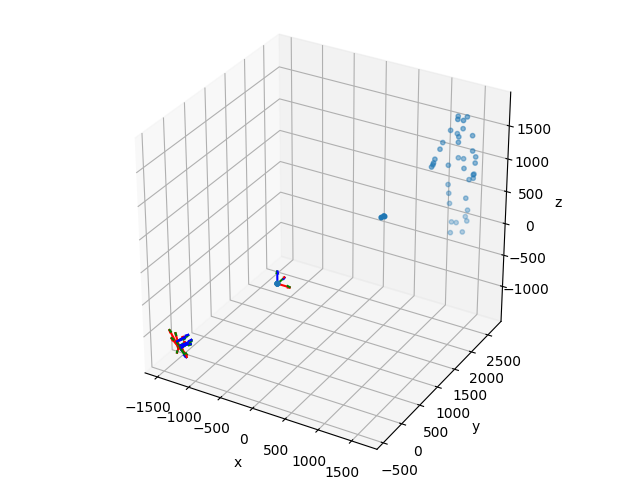

In [105]:
%matplotlib widget
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.set_box_aspect([1.0, 1.0, 1.0])

zero_Tr = np.eye(4)
c3d_helper.marker_T_at_frame_vector(1)
# marker_T0 = np.zeros((4, 4))
# marker_T0[:3, :3] = Rotation.from_euler('xyz', [np.pi/2, 0, 0]).as_matrix()
# marker_T0[:-1, -1] = [0, 0, 550]
# # marker_T0[:-1, -1] = Rotation.from_euler('xyz', [-np.pi/2, 0, 0]).as_matrix() @ marker_T0[:-1, -1]
# marker_T0[-1, -1] = 1
# print(marker_T0)

vis_utils.plot_points_3d(ax, 
        proj_helper.transform_points(
            c3d_helper.points_dict_to_array(c3d_helper.get_points_dict(vicon_labeled_frames[0])), zero_Tr))

# for i in range(len(vicon_labeled_frames)):
#     marker_T = np.linalg.inv(c3d_helper.markers_T[vicon_labeled_frames[i]])
#     print(Rotation.from_matrix(marker_T[:3, :3]).as_euler('xyz'))
#     vis_utils.plot_points_3d(ax,
#                             proj_helper.transform_points(
#                                 proj_helper.world_points[i*7:(1+i)*7],
#                                 zero_Tr
#                             )
#     )
    # vis_utils.plot_points_3d(ax,
    #                         proj_helper.transform_points(
    #                             proj_helper.world_points[i*7:(1+i)*7],
    #                             marker_T
    #                         )
    # )

vis_utils.plot_frame(ax, zero_Tr)

for Tr in c3d_helper.markers_T.values():
    vis_utils.plot_frame(ax, np.linalg.inv(Tr))
    vis_utils.plot_frame(ax, np.linalg.inv(Tr) @ np.linalg.inv(T))

vis_utils.set_axes_equal(ax)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.tight_layout()

plt.show()

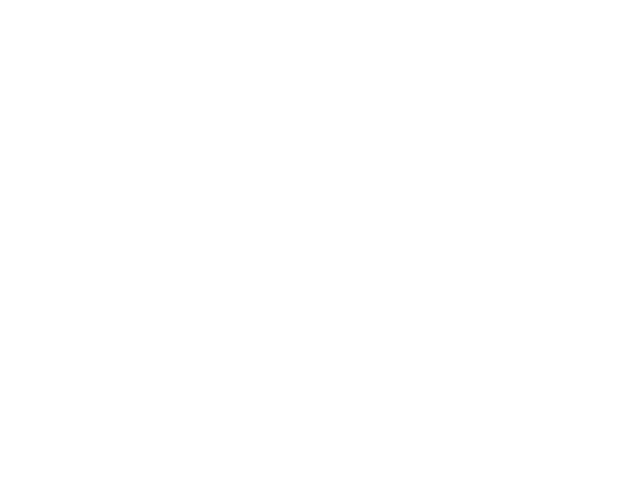

In [106]:
plt.close()
plt.clf()

In [107]:
# proj_helper.undistort_image_points()
print(proj_helper.K)

[[547.703   0.    326.626]
 [  0.    546.179 221.795]
 [  0.      0.      1.   ]]


In [108]:
projected_points = proj_helper.project_to_frame(
    proj_helper.transform_points(
        proj_helper.world_points, T
        )
    )

# projected_points = proj_helper.project_to_frame(
#     proj_helper.world_points
#     )

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


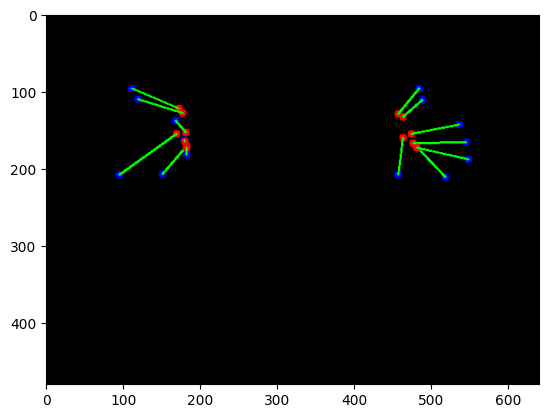

In [109]:
%matplotlib inline
plt.clf()
frame = np.zeros((480, 640, 3))
frame = vis_utils.plot_2d_difference(frame, proj_helper.image_points, projected_points)
plt.imshow(frame)
plt.show()

0
1


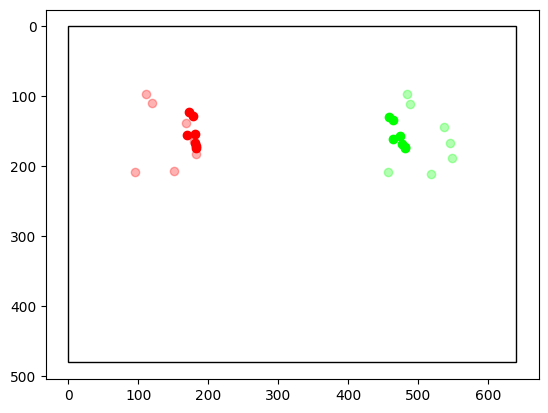

In [110]:
%matplotlib inline
fig = plt.figure()
ax = plt.axes()

s = 7
colors = [
    (1.0, 0.0, 0.0),
    (0.0, 1.0, 0.0),
    (0.0, 0.0, 1.0),
    (1.0, 1.0, 0.0),
    (1.0, 0.0, 1.0),
    (0.0, 1.0, 1.0),
    (1.0, 1.0, 1.0),
    (1.0, 1.0, 1.0)
]
for i, t in enumerate(labels_times):
    print(i)
    vis_utils.plot_2d_points_plt(ax, projected_points[s*i:s*(i+1)], color=colors[i])

    alpha = 0.3
    vis_utils.plot_2d_points_plt(ax, proj_helper.image_points[s*i:s*(i+1)], color=colors[i], alpha=alpha)

ax.add_patch(Rectangle((0, 0), 640, 480, fill=False))

xlim = ax.get_xlim()
ylim = ax.get_ylim()

ax.set_xlim(min(0, xlim[0]), max(640, xlim[1]))
ax.set_ylim(min(0, ylim[0]), max(480, ylim[1]))

ax.axes.set_aspect('equal')

plt.gca().invert_yaxis()

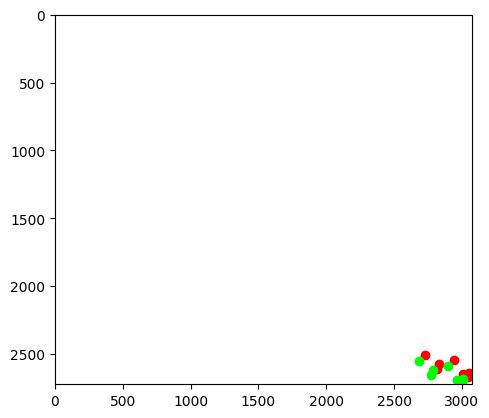

In [23]:
%matplotlib inline
fig = plt.figure()
ax = plt.axes()

s = 7

vis_utils.plot_2d_points_plt(ax, proj_helper.world_points[:s, :2], color=(1.0, 0.0, 0.0))
vis_utils.plot_2d_points_plt(ax, proj_helper.world_points[s:s*2, :2], color=(0.0, 1.0, 0.0))


xlim = ax.get_xlim()
ylim = ax.get_ylim()

ax.set_xlim(min(0, xlim[0]), max(640, xlim[1]))
ax.set_ylim(min(0, ylim[0]), max(480, ylim[1]))

ax.axes.set_aspect('equal')

plt.gca().invert_yaxis()

In [24]:
dvs_helper.read_events()

importIitYarp trying path: /home/schiavazza/data/hpe/vicon_recordings/giovanna/5
importIitYarp trying path: /home/schiavazza/data/hpe/vicon_recordings/giovanna/5/ATIS


  6%|▌         | 4171/72912 [00:09<02:34, 445.27it/s]


KeyboardInterrupt: 

In [ ]:
c3d_helper.find_start_time()

array([1.41])

In [ ]:

def get_projected_points(frame_id):
    T_markers = c3d_helper.marker_T_at_frame_vector(frame_id)
    v_points = c3d_helper.get_points_frame(frame_id)
    v_points = v_points[:, :4]
    v_points[:, -1] = 1
    # rot = Rotation.from_matrix(T_markers[:3, :3]).as_rotvec()
    # t = T_markers[:-1, -1]

    # projected_points_cv2, _ = cv2.projectPoints(v_points[:, :-1].transpose(), rot, t, proj_helper.K, proj_helper.D)
    # projected_points_cv2 = projected_points_cv2[:, 0, :]

    projected_points = proj_helper.project_to_frame(
        proj_helper.transform_points(
            v_points, T @ T_markers
            )
        )
    
    return projected_points

# Define the codec and create VideoWriter object
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter('output.mp4', fourcc, 30.0, (640, 480))

for i in tqdm(range(int(1), int(c3d_helper.reader.frame_count), 3)):
    projected_points = get_projected_points(i);
    
    frame = np.ones((480, 640, 3), dtype=np.uint8) * 100

    ts_start = c3d_helper.frame_times[i]
    frame = utils.extract_frame(dvs_helper.events, ts_start, ts_start + 0.01, (480, 640, 3))

    frame = vis_utils.plot_2d_points(frame, projected_points)
    out.write(frame.astype(np.uint8))
out.release()

  0%|          | 0/907 [00:00<?, ?it/s]

/tmp/ipykernel_295596/2659980481.py:33: RuntimeWarning: invalid value encountered in cast
  out.write(frame.astype(np.uint8))
100%|██████████| 907/907 [03:25<00:00,  4.41it/s]


In [ ]:
labels = [
    'event_camera:front',
    'event_camera:side',
    'event_camera:top'
]

xs = []
for i in tqdm(range(1, int(c3d_helper.reader.frame_count / 4), 3)):
    T = c3d_helper.marker_T_at_frame_vector(i)

    rot = Rotation.from_matrix(T[:3, :3])

    xs.append(rot.as_euler('xyz'))
    # vicon_points_mark = c3d_helper.transform_points_to_marker_frame(vicon_points)

  0%|          | 0/328 [00:00<?, ?it/s]

100%|██████████| 328/328 [00:14<00:00, 22.33it/s]


In [ ]:
labels = [
    'event_camera:front',
    'event_camera:side',
    'event_camera:top'
]

start_frame = 500
end_frame = 3000
step = 2
n_frames = int((end_frame - start_frame) / step)

vicon_points = c3d_helper.get_vicon_points(np.arange(start_frame, end_frame, step), labels)
# vicon_points_mark = c3d_helper.transform_points_to_marker_frame(vicon_points)

camera_markers_points = c3d_helper.points_dict_to_array(vicon_points)
n_markers = int(camera_markers_points.shape[0] / n_frames)

frames_points = camera_markers_points.reshape(n_frames, n_markers, 4)[:, :, :3]

T_markers_list = []
for i in range(start_frame, end_frame, step):
    T_marker = c3d_helper.marker_T_at_frame_vector(i)

    X, Y, Z, U, V, W = vis_utils.XYZ_frame(T_marker)

    T_markers_list.append([X, Y, Z, U, V, W])


KeyboardInterrupt: 

In [ ]:
camera_markers_points.shape

(3750, 4)

(49, 4)


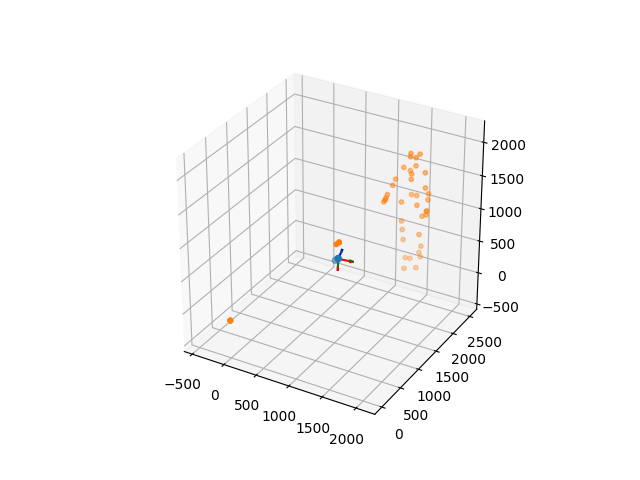

In [ ]:
%matplotlib widget
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.set_box_aspect([1.0, 1.0, 1.0])

skel = ax.scatter(frames_points[0][:, 0], frames_points[0][:, 1], frames_points[0][:, 2])

vis_utils.plot_points_3d(ax, 
        proj_helper.transform_points(
            c3d_helper.points_dict_to_array(c3d_helper.get_points_dict(vicon_labeled_frames[0])), zero_Tr))

T_marker = c3d_helper.marker_T_at_frame_vector(start_frame)
frame_plot = vis_utils.plot_frame(ax, np.linalg.inv(T_marker))

def quiver_data_to_segments(X, Y, Z, u, v, w, length=1):
    segments = (X, Y, Z, X+v*length, Y+u*length, Z+w*length)
    segments = np.array(segments).reshape(6,-1)
    return [[[x, y, z], [u, v, w]] for x, y, z, u, v, w in zip(*list(segments))]

def update(n):
    skel._offsets3d = (frames_points[n][:, 0], frames_points[n][:, 1], frames_points[n][:, 2])
    # points._offsets3d = (sub_frames[n][:, 0], sub_frames[n][:, 1], sub_frames[n][:, 2])
    # X, Y, Z, U, V, W = T_markers_list[n]
    # segments = quiver_data_to_segments(X, Y, Z, U, V, W, length=5)
    # frame_plot.set_segments(segments)


# points = ax.scatter(sub_frames[0][:, 0], sub_frames[0][:, 1], sub_frames[0][:, 2], c='red', marker='^')
vis_utils.set_axes_equal(ax)

ani = matplotlib.animation.FuncAnimation(fig, update, range(n_frames), 
                               interval=200, blit=True)

plt.show()

In [ ]:
plt.close()

In [ ]:
labels = [
    'event_camera:front',
    'event_camera:side',
    'event_camera:top'
]

start_frame = 500
end_frame = 3000
step = 1
n_frames = int((end_frame - start_frame) / step)
# samples_times = np.linspace(14.0, 15.0, 20)
# vicon_labeled_frames = c3d_helper.get_frame_time(samples_times)
vicon_points = c3d_helper.get_vicon_points(vicon_labeled_frames, labels)
camera_markers_points = c3d_helper.points_dict_to_array(vicon_points)


In [ ]:
vicon_labeled_frames

[1562, 1662]

1.0
1.0


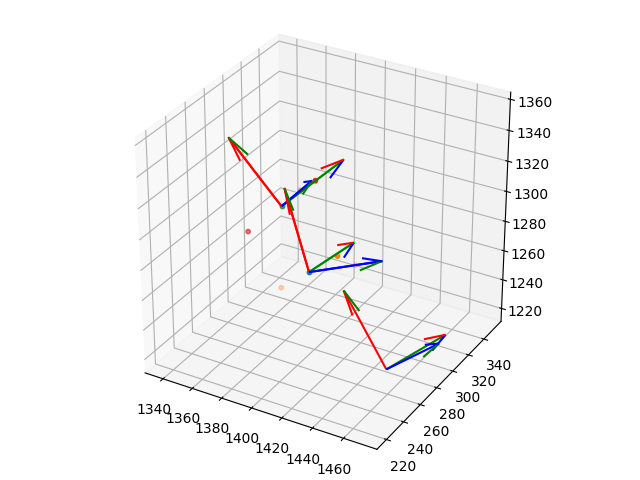

In [ ]:
%matplotlib widget
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.set_box_aspect([1.0, 1.0, 1.0])

zero_Tr = np.eye(4)

# vis_utils.plot_points_3d(ax, 
#         proj_helper.transform_points(
#             c3d_helper.points_dict_to_array(c3d_helper.get_points_dict(vicon_labeled_frames[0])), zero_Tr))

n_frames = int(camera_markers_points.shape[0] / 3)

# for i in range(n_frames):
#     vis_utils.plot_points_3d(ax, 
#         camera_markers_points.reshape(n_frames, 3, 4)[i, :, :-1]
#     )

colors = [
    (1.0, 0.0, 0.0),
    (0.0, 1.0, 0.0),
    (0.0, 0.0, 1.0)
]

prev_mid = [0.0, 0.0, 0.0]
for i, ps in enumerate(vicon_points['points']):
    camera_front = ps['event_camera:front'][:3]
    camera_side = ps['event_camera:side'][:3]
    camera_top = ps['event_camera:top'][:3]

    side_top_mid = (camera_side + camera_top) / 2
    vis_utils.plot_points_3d(ax, np.array([side_top_mid]))

    z = camera_front - side_top_mid
    z = z / np.linalg.norm(z)

    t = camera_top - side_top_mid
    t = t / np.linalg.norm(t)

    x = np.cross(t, z)
    x = x / np.linalg.norm(x)

    y = np.cross(z, x)
    y = y / np.linalg.norm(y)

    vectors = np.vstack((x, y, z))

    print(np.linalg.det(vectors))

    vectors = vectors * 50
    x = vectors[0]
    y = vectors[1]
    z = vectors[2]

    
#     ax.plot([camera_top[0], camera_front[0], camera_side[0]], 
#             [camera_top[1], camera_front[1], camera_side[1]], 
#             [camera_top[2], camera_front[2], camera_side[2]])
    
    # ax.plot_trisurf([camera_top[0], camera_front[0], camera_side[0]], 
    #     [camera_top[1], camera_front[1], camera_side[1]], 
    #     [camera_top[2], camera_front[2], camera_side[2]],
    #     color=colors[i])
    
    ax.plot([side_top_mid[0], side_top_mid[0] + z[0]],
            [side_top_mid[1], side_top_mid[1] + z[1]],
            [side_top_mid[2], side_top_mid[2] + z[2]], c=colors[2])
    
    ax.plot([side_top_mid[0], side_top_mid[0] + y[0]],
            [side_top_mid[1], side_top_mid[1] + y[1]],
            [side_top_mid[2], side_top_mid[2] + y[2]], c=colors[1])
    
    ax.plot([side_top_mid[0], side_top_mid[0] + x[0]],
            [side_top_mid[1], side_top_mid[1] + x[1]],
            [side_top_mid[2], side_top_mid[2] + x[2]], c=colors[0])


    side_top_mid = (camera_side + camera_top) / 2
    

#     tmp = camera_front + (camera_front - side_top_mid) * 5
#     ax.plot([side_top_mid[0], tmp[0]],
#             [side_top_mid[1], tmp[1]],
#             [side_top_mid[2], tmp[2]])
    
    camera_points = np.copy(camera_markers_points.reshape(n_frames, 3, 4))
    
    vis_utils.plot_points_3d(ax, 
        camera_points[i, :, :-1]
    )

for k in sorted(c3d_helper.markers_T.keys())[:]:
    Tr = np.copy(c3d_helper.markers_T[k])

#     # Tr[:3, :3] = T_0[:3, :3] @ Tr[:3, :3]
    vis_utils.plot_frame(ax, np.linalg.inv(Tr), arrow_length=50)
#     # vis_utils.plot_frame(ax, np.linalg.inv(Tr) @ np.linalg.inv(T))
#     print(Tr[:3, :3].transpose())

vis_utils.set_axes_equal(ax)
plt.tight_layout()

plt.show()



In [ ]:
plt.close()
plt.clf()

In [ ]:
labels = [
    'event_camera:front',
    'event_camera:side',
    'event_camera:top'
]

start_frame = 500
end_frame = 3000
step = 1
n_frames = int((end_frame - start_frame) / step)

vicon_points = c3d_helper.get_vicon_points(np.arange(start_frame,end_frame, step), labels)
camera_markers_points = c3d_helper.points_dict_to_array(vicon_points)


In [ ]:
distances = []
for i, ps in enumerate(vicon_points['points']):
    camera_front = ps['event_camera:front'][:3]
    camera_side = ps['event_camera:side'][:3]
    camera_top = ps['event_camera:top'][:3]

    t  = camera_top - camera_front
    distances.append(np.linalg.norm(t))

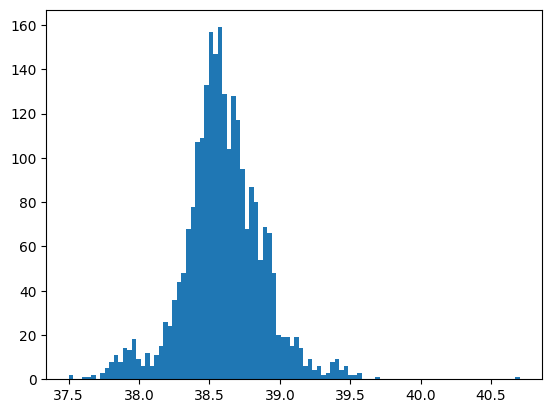

In [ ]:
%matplotlib inline
plt.clf()

distances = np.array(distances)
distances = distances[distances > 0.1]

plt.hist(distances, 100);
plt.show()

TypeError: '>' not supported between instances of 'list' and 'int'

In [ ]:
start_frame = 200
end_frame = 3500
step = 1
n_frames = int((end_frame - start_frame) / step)

rot_traj= np.zeros((n_frames, 3))
for i in tqdm(range(start_frame, end_frame, step)):
    T_marker = c3d_helper.marker_T_at_frame_vector(i)
    # T_m = np.linalg.inv(T_marker)
    # pos_traj[i - start_frame] = T_m[:-1, -1]

    rot = Rotation.from_matrix(T_marker[:3, :3]).as_euler('xyz')

    rot_traj[i - start_frame] = rot


  0%|          | 0/3300 [00:00<?, ?it/s]

 63%|██████▎   | 2078/3300 [03:53<03:58,  5.12it/s]/home/schiavazza/code/hpe/vicon_recordings/src/data_helpers.py:163: RuntimeWarning: invalid value encountered in divide
  t  = t / np.linalg.norm(t)
/home/schiavazza/code/hpe/vicon_recordings/src/data_helpers.py:166: RuntimeWarning: invalid value encountered in divide
  f = f / np.linalg.norm(f)
/tmp/ipykernel_31243/3012687754.py:12: UserWarning: Gimbal lock detected. Setting third angle to zero since it is not possible to uniquely determine all angles.
  rot = Rotation.from_matrix(T_marker[:3, :3]).as_euler('xyz')
 70%|███████   | 2322/3300 [04:48<03:41,  4.41it/s]

 70%|███████   | 2324/3300 [04:48<03:48,  4.27it/s]

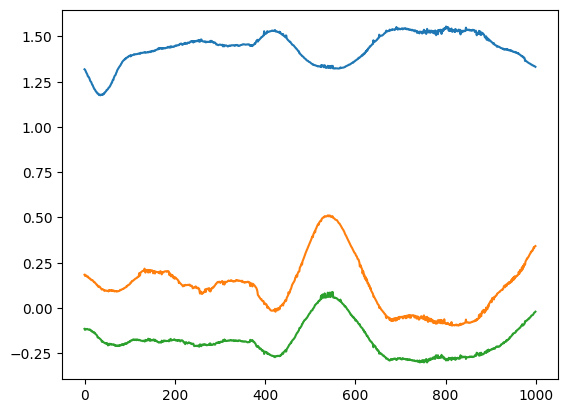

In [ ]:
plt.plot(rot_traj)

In [ ]:
camera_markers_points.shape

(7500, 4)

In [ ]:
pos_traj.shape

(2500, 3)

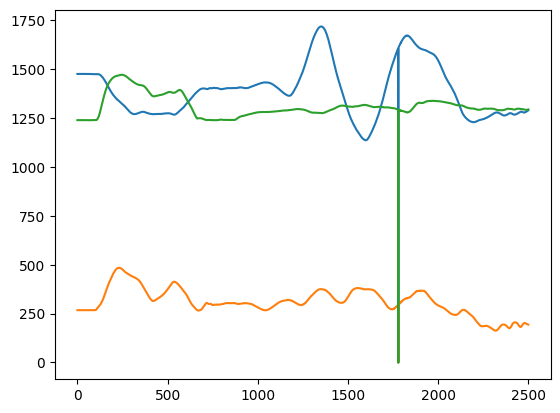

In [ ]:
plt.plot(camera_markers_points.reshape(2500, 3, 4)[:, 0, :-1])